# Results

Continuous Model :
    Kaggle Score: 5.55679
    RMSE: 0.18

Baseline Model: Kaggle Score: 2.97070 RMSE: 0.17

Category + Continuous Model: Kaggle Score: 1.02508 RMSE: 0.15

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
ROOT_DIR = Path('.').resolve().parents[0].absolute()
DATA_DIR = ROOT_DIR / 'data' / 'house-prices'

target_column = 'SalePrice'

In [4]:
df_master = pd.read_csv(DATA_DIR / 'train.csv', index_col='Id')
df_master.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500
407,50,RL,51.0,10480,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,6,5,1936,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,1064,1064,GasA,Ex,Y,FuseA,1166,0,473,1639,0,0,1,0,3,1,TA,6,Maj2,0,NaN,Detchd,1936.0,Unf,1,240,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,115000
1364,60,RL,73.0,8499,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,616,616,GasA,Ex,Y,SBrkr,616,796,0,1412,0,0,2,1,3,1,Gd,6,Typ,1,Gd,BuiltIn,2007.0,Fin,2,432,TA,TA,Y,0,36,0,0,0,0,NaN,NaN,NaN,0,3,2007,New,Partial,156932
1035,30,RL,50.0,6305,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,5,7,1938,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,PConc,Fa,Fa,No,Unf,0,Unf,0,920,920,GasA,Ex,Y,SBrkr,954,0,0,954,0,0,1,0,2,1,Fa,5,Typ,1,Gd,Basment,1938.0,Unf,1,240,Fa,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,119750
1174,50,RL,138.0,18030,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,6,1946,1994,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,152,BLQ,469,977,1598,GasA,TA,Y,SBrkr,1636,971,479,3086,0,0,3,0,3,1,Ex,12,Maj1,1,Gd,NaN,NaN,NaN,0,0,NaN,NaN,Y,122,0,0,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Normal,200500


# Pre-processing

## Continuous data

In [4]:
df_continuous = df_master.select_dtypes(include='number').copy()
df_continuous.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [5]:
df_continuous.isna().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [6]:
df_continuous = df_continuous.dropna()

In [7]:
df_continuous.shape

(1121, 37)

## Baseline model

In [17]:
df_base = df_master.select_dtypes(include='number').copy()
df_base.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [18]:
df_base.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

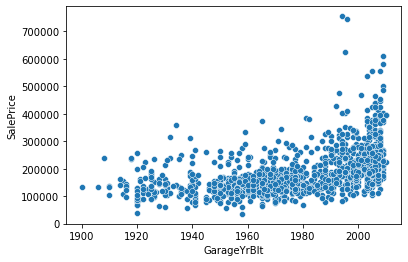

In [19]:
sns.scatterplot(data=df_base, x='GarageYrBlt', y=target_column)

In [20]:
df_base['LotFrontage'].fillna(np.mean(df_base['LotFrontage']), inplace=True)

In [21]:
df_base = df_base.dropna()

In [22]:
cont_cols = df_base.columns
len(cont_cols)

37

<AxesSubplot:>

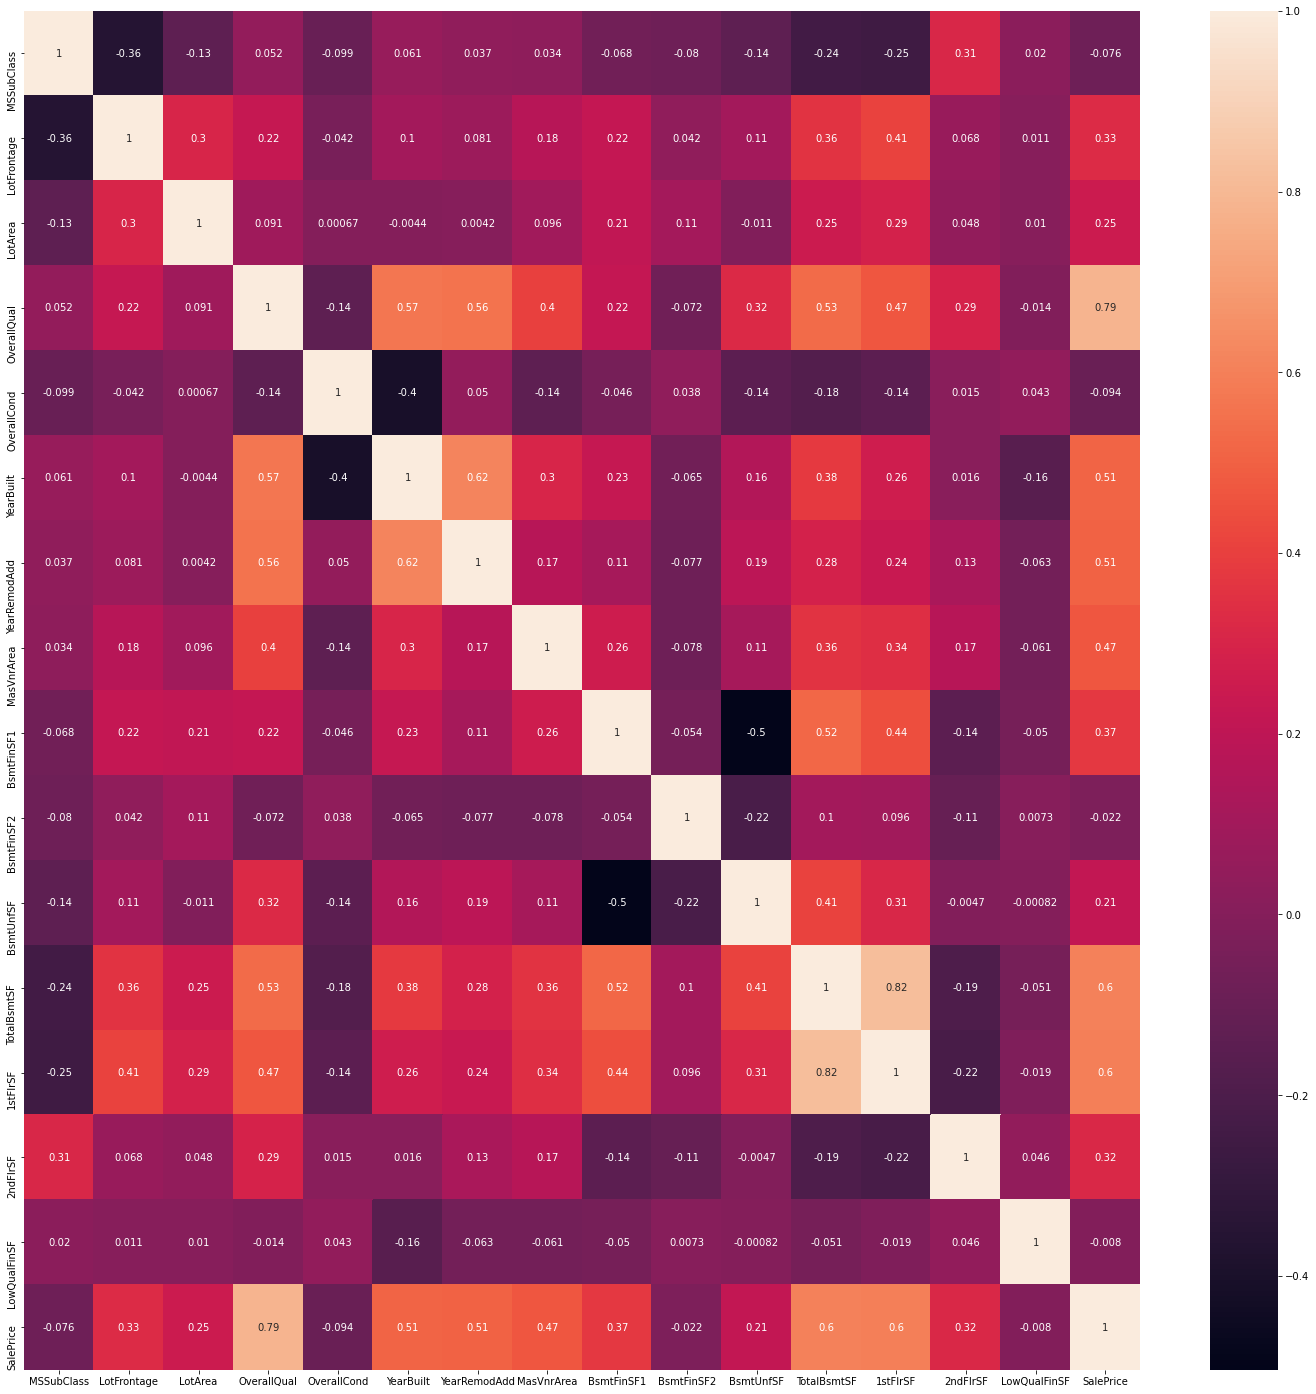

In [23]:
plt.figure(figsize=(25,25))
sns.heatmap(df_base[list(cont_cols[:15]) + [target_column]].corr(), annot=True)

<AxesSubplot:>

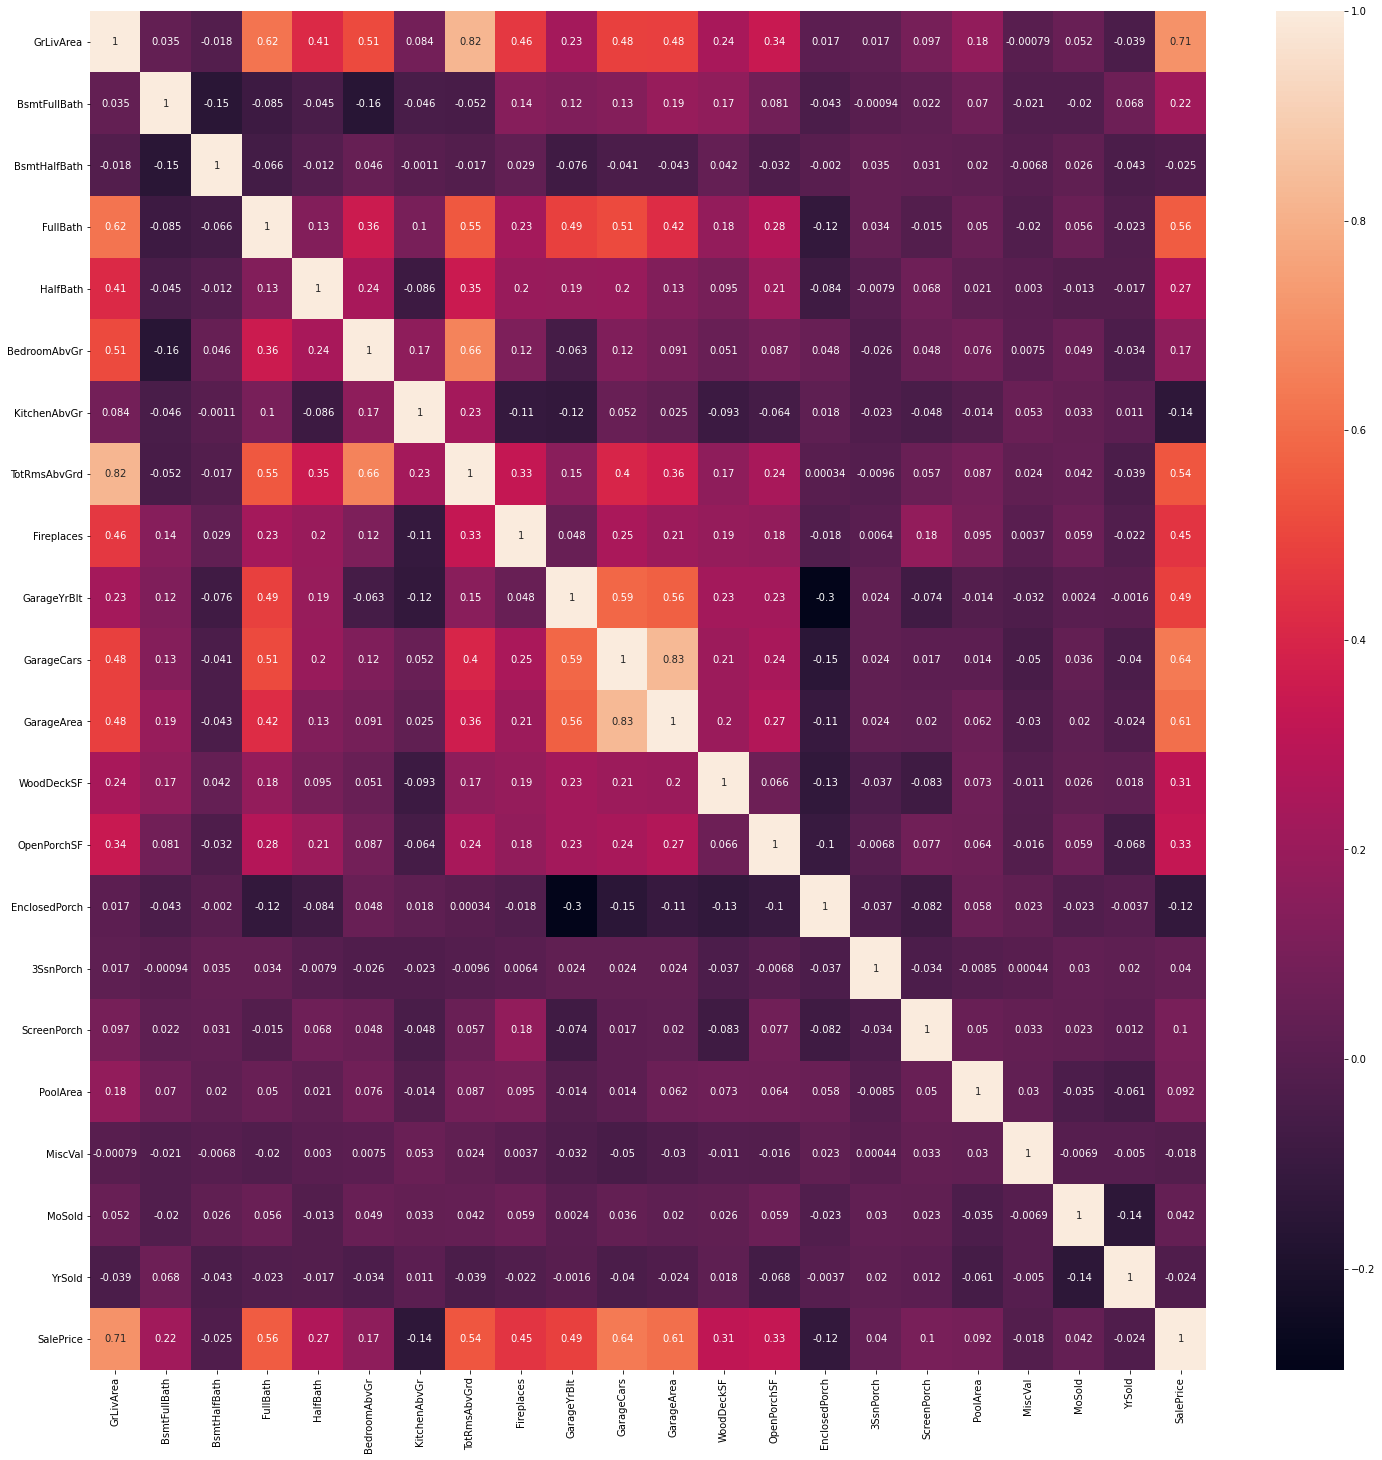

In [24]:
plt.figure(figsize=(25,25))
sns.heatmap(df_base[cont_cols[15:]].corr(), annot=True)

In [25]:
to_drop = ['BsmtFinSF2', 'YrSold', 'BsmtHalfBath']

In [26]:
df_base.drop(columns=to_drop, axis=1, inplace=True)

In [27]:
df_base.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,150,856,856,854,0,1710,1,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,284,1262,1262,0,0,1262,0,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,434,920,920,866,0,1786,1,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,540,756,961,756,0,1717,1,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,490,1145,1145,1053,0,2198,1,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,250000


In [28]:
df_base.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
SalePrice        0
dtype: int64

## Categorical and Continuous model

In [36]:
df = df_master.copy()

In [37]:
df.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
140,60,RL,65.0,15426,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,6,5,1997,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,821,Unf,0,107,928,GasA,Ex,Y,SBrkr,928,836,0,1764,1,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,1997.0,RFn,2,470,TA,TA,Y,276,99,0,0,0,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,231500
1032,75,RL,102.0,15863,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,2.5Fin,7,3,1920,1970,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,523,Unf,0,301,824,GasA,Ex,Y,SBrkr,1687,998,397,3082,1,0,2,1,5,1,TA,12,Typ,2,TA,Basment,1970.0,Fin,2,672,TA,TA,Y,136,63,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,197000
775,20,RL,110.0,14226,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,375.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1935,1935,GasA,Gd,Y,SBrkr,1973,0,0,1973,0,0,2,0,3,1,Gd,9,Typ,1,Gd,Attchd,2006.0,Fin,3,895,TA,TA,Y,315,45,0,0,0,0,NaN,NaN,NaN,0,7,2007,New,Partial,395000
438,45,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,7,1926,2004,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,PConc,TA,TA,No,Unf,0,Unf,0,884,884,GasA,Gd,Y,SBrkr,904,0,0,904,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1926.0,Unf,1,180,TA,TA,Y,0,0,105,0,0,0,NaN,NaN,NaN,0,1,2009,WD,Normal,119000
101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2001,Gable,CompShg,Plywood,Plywood,BrkFace,28.0,TA,TA,PConc,TA,TA,Mn,ALQ,1200,Unf,0,410,1610,GasA,Gd,Y,SBrkr,1610,0,0,1610,1,0,2,0,3,1,Gd,6,Typ,2,TA,Attchd,1977.0,RFn,2,480,TA,TA,Y,168,68,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000


In [38]:
df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [39]:
null_cols = df.isnull().columns
null_cols

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

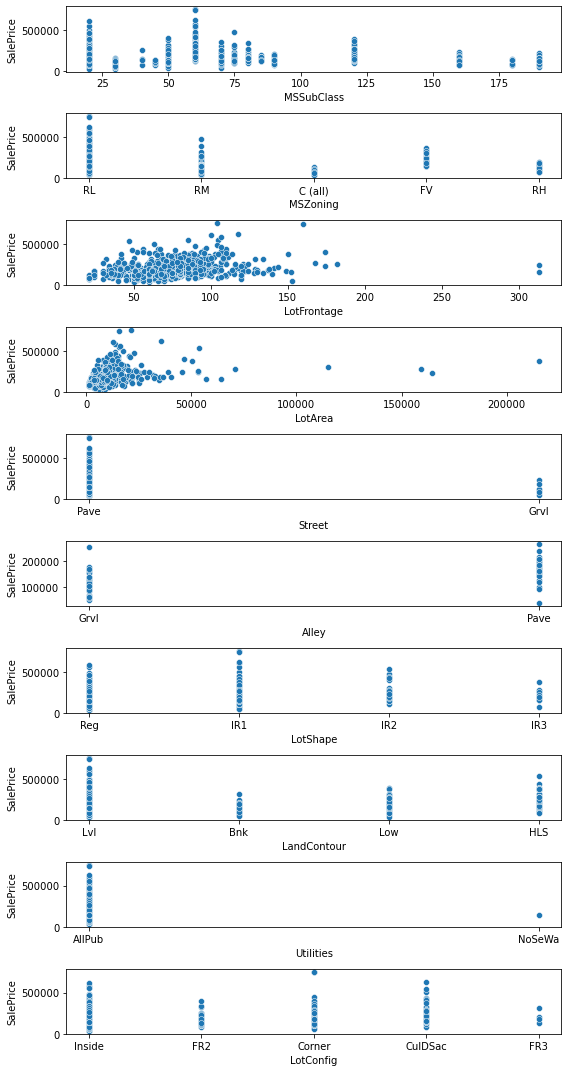

In [40]:
fig, ax = plt.subplots(10, 1, figsize=(8,15))

i = 0
for col in null_cols[:10]:
    sns.scatterplot(data=df, x=col, y=target_column, ax=ax[i])
    i += 1

fig.tight_layout()

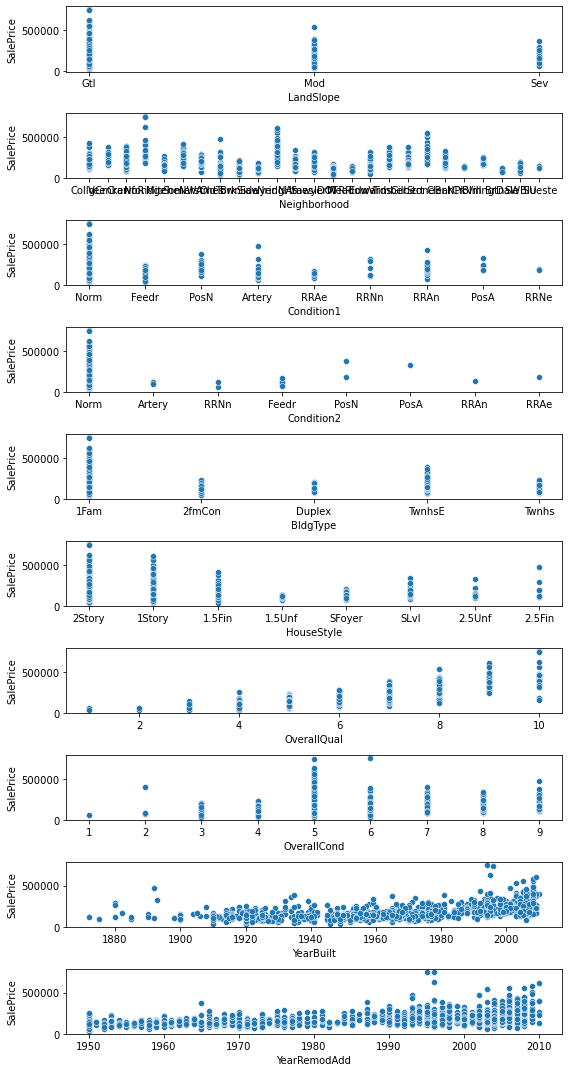

In [41]:
fig, ax = plt.subplots(10, 1, figsize=(8,15))

i = 0
for col in null_cols[10:20]:
    sns.scatterplot(data=df, x=col, y=target_column, ax=ax[i])
    i += 1

fig.tight_layout()

In [42]:
to_drop = ['BsmtFinSF2', 'YrSold', 'BsmtHalfBath', 'GarageYrBlt',
           'MSSubClass', 'Street',  'LotShape', 'LotConfig', 'Neighborhood',
           'LowQualFinSF', 'PoolArea', 'MiscVal', 'MoSold', '3SsnPorch','YearRemodAdd',
           'GarageType', 'GarageFinish','PoolArea', '3SsnPorch', 'MiscFeature', 'PoolQC', 'MSZoning', 'Alley', 'RoofStyle']

In [45]:
df.drop(columns=to_drop, inplace=True, axis=1)

In [46]:
df = df.dropna()

In [47]:
categ_cols = df.select_dtypes(include='object')

In [49]:
categ_cols.head()

,LandContour,Utilities,LandSlope,Condition1,Condition2,BldgType,HouseStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Lvl,AllPub,Gtl,Norm,Norm,1Fam,2Story,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Fa,TA,TA,Y,Fa,WD,Normal
2,Lvl,AllPub,Gtl,Feedr,Norm,1Fam,1Story,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,TA,TA,Y,Fa,WD,Normal
3,Lvl,AllPub,Gtl,Norm,Norm,1Fam,2Story,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,TA,TA,Y,Fa,WD,Normal
4,Lvl,AllPub,Gtl,Norm,Norm,1Fam,2Story,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,TA,TA,Y,Fa,WD,Abnorml
5,Lvl,AllPub,Gtl,Norm,Norm,1Fam,2Story,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,TA,TA,Y,Fa,WD,Normal


In [50]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


for col in categ_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [51]:
df.head()

,LotFrontage,LotArea,LandContour,Utilities,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,3,0,0,2,2,0,5,7,5,2003,1,12,13,1,196.0,2,4,2,2,3,4,2,706,5,150,856,1,0,1,5,856,854,1710,1,2,1,3,1,2,8,6,0,1,2,548,4,4,2,0,61,0,0,0,8,4,208500
2,80.0,9600,3,0,0,1,2,0,2,6,8,1976,1,8,8,3,0.0,3,4,1,2,3,2,0,978,5,284,1262,1,0,1,5,1262,0,1262,0,2,0,3,1,3,6,6,1,4,2,460,4,4,2,298,0,0,0,0,8,4,181500
3,68.0,11250,3,0,0,2,2,0,5,7,5,2001,1,12,13,1,162.0,2,4,2,2,3,3,2,486,5,434,920,1,0,1,5,920,866,1786,1,2,1,3,1,2,6,6,1,4,2,608,4,4,2,0,42,0,0,0,8,4,223500
4,60.0,9550,3,0,0,2,2,0,5,7,5,1915,1,13,15,3,0.0,3,4,0,3,1,4,0,216,5,540,756,1,2,1,5,961,756,1717,1,1,0,3,1,2,7,6,1,2,3,642,4,4,2,0,35,272,0,0,8,0,140000
5,84.0,14260,3,0,0,2,2,0,5,8,5,2000,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,490,1145,1,0,1,5,1145,1053,2198,1,2,1,4,1,2,9,6,1,4,3,836,4,4,2,192,84,0,0,0,8,4,250000


# Model training

In [70]:
df_final = df
X, y = df_final.drop(target_column, axis=1), df_final[target_column]
X.shape, y.shape

((1460, 57), (1460,))

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape

((1168, 57), (292, 57))

In [66]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [67]:
import statsmodels.api as sm
X_sm = sm.add_constant(X)
ols_reg = sm.OLS(y, X_sm).fit()
print(ols_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     178.5
Date:                Sat, 05 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:52:36   Log-Likelihood:                -16265.
No. Observations:                1371   AIC:                         3.260e+04
Df Residuals:                    1338   BIC:                         3.277e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.059e+05   1.52e+05     -5.975

# Model evaluation

In [68]:
import numpy as np
from sklearn.metrics import mean_squared_log_error

def compute_rmsle(y_test: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    return round(rmsle, precision)

In [69]:
y_pred = model.predict(X_test)
# Replace negative predictions with 0
y_pred = np.where(y_pred < 0, 0, y_pred)
compute_rmsle(y_test, y_pred)

0.15

# Inference

In [15]:
inference_df = pd.read_csv(DATA_DIR / 'test.csv', index_col='Id')
inference_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Continuous model

In [16]:
continuous_inference_df = inference_df.select_dtypes(include='number')
continuous_inference_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010
1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010
1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010
1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010
1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010


In [17]:
continuous_inference_df.shape

(1459, 36)

In [18]:
continuous_inference_df = continuous_inference_df.dropna()

In [19]:
continuous_inference_df.shape

(1146, 36)

In [20]:
predictions = model.predict(continuous_inference_df)
predictions

array([112723.52469084, 147015.61932842, 168845.14230371, ...,
        53638.52988754, 167715.2446004 , 257839.17246972])

## Baseline inference

In [142]:
base_inference_df = inference_df.select_dtypes(include='number')
base_inference_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010
1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010
1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010
1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010
1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010


In [145]:
drop = []

for col in base_inference_df.columns:
    if (col in to_drop):
        drop.append(col)
        

In [146]:
base_inference_df = base_inference_df.drop(columns=drop)

In [147]:
base_inference_df.shape

(1459, 25)

In [148]:
base_inference_df.isnull().sum()

LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
MasVnrArea        15
BsmtFinSF1         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
ScreenPorch        0
dtype: int64

In [149]:
base_inference_df['LotFrontage'] = base_inference_df.fillna(np.mean(base_inference_df['LotFrontage']))

In [150]:
base_inference_df = base_inference_df.dropna()

In [152]:
base_inference_df.shape

(1441, 25)

In [153]:
predictions = model.predict(base_inference_df)
predictions

In [ ]:
base_inference_df.shape

## improved data Inference

In [58]:
imp_inference_df = inference_df.copy()

In [59]:
imp_inference_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [60]:
imp_inference_df.shape

(1459, 79)

In [61]:
drop = []

for col in imp_inference_df.columns:
    if (col in to_drop):
        drop.append(col)

In [62]:
imp_inference_df = imp_inference_df.drop(columns=drop)

In [63]:
imp_inference_df.isnull().columns

Index(['LotFrontage', 'LotArea', 'LandContour', 'Utilities', 'LandSlope',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [64]:
imp_inference_df['LotFrontage'].fillna(np.mean(imp_inference_df['LotFrontage']), inplace=True)
imp_inference_df['BsmtQual'].fillna('Unf', inplace=True)
imp_inference_df['BsmtCond'].fillna('Unf', inplace=True)
imp_inference_df['BsmtExposure'].fillna('Unf', inplace=True)
imp_inference_df['BsmtFinType1'].fillna('Unf', inplace=True)
imp_inference_df['BsmtFinType2'].fillna('Unf', inplace=True)
imp_inference_df['Electrical'].fillna('Unf', inplace=True)
imp_inference_df['FireplaceQu'].fillna('Unf', inplace=True)
imp_inference_df['Fence'].fillna('Unf', inplace=True)
imp_inference_df['GarageQual'].fillna('Unf', inplace=True)
imp_inference_df['GarageCond'].fillna('Unf', inplace=True)
imp_inference_df['MasVnrType'].fillna('Unf', inplace=True)
imp_inference_df['MasVnrArea'].fillna(0,inplace=True)

In [65]:
imp_inference_df.shape

(1459, 57)

In [66]:
imp_inference_df = imp_inference_df.dropna()

In [67]:
imp_inference_categ = imp_inference_df.select_dtypes(include='object')

In [68]:
for col in imp_inference_categ:
    imp_inference_df[col] = label_encoder.fit_transform(imp_inference_df[col])

In [69]:
imp_inference_df.shape

(1449, 57)

In [70]:
imp_inference_df.isnull().sum()

LotFrontage      0
LotArea          0
LandContour      0
Utilities        0
LandSlope        0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

In [71]:
predictions = model.predict(imp_inference_df)
predictions

array([ 88740.54579553, 150089.03090485, 170132.78394192, ...,
       135280.72706043,  98827.63637816, 241176.51100352])

## Fill negatives

In [72]:
# Check if there is negative predictions, if so get their indexs
np.where(predictions < 0)

(array([386], dtype=int64),)

In [73]:
# Replace negative predictions with 0
predictions = np.where(predictions < 0, 0, predictions)
np.where(predictions < 0)

(array([], dtype=int64),)

# Submission

## Continuous Submission

In [23]:
continuous_inference_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010
1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010
1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010
1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010
1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010


In [24]:
continuous_inference_df[target_column] = predictions
continuous_inference_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,112723.524691
1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,147015.619328
1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,168845.142304
1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,196387.020432
1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010,201418.152820


In [25]:
continuous_inference_df = continuous_inference_df[[target_column]].reset_index()
continuous_inference_df.head()

,Id,SalePrice
0,1461,112723.524691
1,1462,147015.619328
2,1463,168845.142304
3,1464,196387.020432
4,1465,201418.152820


In [26]:
inference_ids_df = inference_df.reset_index()[['Id']]
inference_ids_df.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [28]:
len(inference_ids_df), len(continuous_inference_df)

(1459, 1146)

In [27]:
f'Number of missing predictions = {len(inference_ids_df) - len(continuous_inference_df)}'

'Number of missing predictions = 313'

In [154]:
submission_df = inference_ids_df.merge(continuous_inference_df, on='Id', how='left')
submission_df.head()

,Id,SalePrice
0,1461,116435.432858
1,1462,114624.032447
2,1463,170340.239789
3,1464,199895.679313
4,1465,198698.271349


## Base submission

In [212]:
base_inference_df[target_column] = predictions
base_inference_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,20.0,11622,5,6,1961,1961,0.0,468.0,270.0,882.0,896,0,0,896,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,123466.094173
1462,20,20.0,14267,6,6,1958,1958,108.0,923.0,406.0,1329.0,1329,0,0,1329,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,159458.424974
1463,60,60.0,13830,5,5,1997,1998,0.0,791.0,137.0,928.0,928,701,0,1629,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,170737.954531
1464,60,60.0,9978,6,6,1998,1998,20.0,602.0,324.0,926.0,926,678,0,1604,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,198979.787385
1465,120,120.0,5005,8,5,1992,1992,0.0,263.0,1017.0,1280.0,1280,0,0,1280,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,191875.154742


In [213]:
base_inference_df = base_inference_df[[target_column]].reset_index()
base_inference_df.head()

,Id,SalePrice
0,1461,123466.094173
1,1462,159458.424974
2,1463,170737.954531
3,1464,198979.787385
4,1465,191875.154742


In [214]:
base_ids_df = inference_df.reset_index()[['Id']]
base_ids_df.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [215]:
f'Number of missing predictions = {len(base_ids_df) - len(base_inference_df)}'

'Number of missing predictions = 94'

In [216]:
submission_df = base_ids_df.merge(base_inference_df, on='Id', how='left')
submission_df.head()

,Id,SalePrice
0,1461,123466.094173
1,1462,159458.424974
2,1463,170737.954531
3,1464,198979.787385
4,1465,191875.154742


## Final Submission

In [74]:
imp_inference_df[target_column] = predictions
imp_inference_df.head()

,LotFrontage,LotArea,LandContour,Utilities,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,80.0,11622,3,0,0,1,2,0,2,5,6,1961,0,10,12,2,0.0,3,4,1,3,3,3,4,468.0,3,270.0,882.0,0,4,1,3,896,0,896,0.0,1,0,2,1,3,5,6,0,5,1.0,730.0,3,4,2,140,0,0,120,2,8,4,88740.545796
1462,81.0,14267,3,0,0,2,2,0,2,6,6,1958,0,11,13,1,108.0,3,4,1,3,3,3,0,923.0,5,406.0,1329.0,0,4,1,3,1329,0,1329,0.0,1,1,3,1,2,6,6,0,5,1.0,312.0,3,4,2,393,36,0,0,4,8,4,150089.030905
1463,74.0,13830,3,0,0,2,2,0,4,5,5,1997,0,10,12,2,0.0,3,4,2,2,3,3,2,791.0,5,137.0,928.0,0,2,1,3,928,701,1629,0.0,2,1,3,1,3,6,6,1,4,2.0,482.0,3,4,2,212,34,0,0,2,8,4,170132.783942
1464,78.0,9978,3,0,0,2,2,0,4,6,6,1998,0,10,12,1,20.0,3,4,2,3,3,3,2,602.0,5,324.0,926.0,0,0,1,3,926,678,1604,0.0,2,1,3,1,2,7,6,1,2,2.0,470.0,3,4,2,360,36,0,0,4,8,4,192738.052493
1465,43.0,5005,1,0,0,2,2,4,2,8,5,1992,0,6,6,2,0.0,2,4,2,2,3,3,0,263.0,5,1017.0,1280.0,0,0,1,3,1280,0,1280,0.0,2,0,2,1,2,5,6,0,5,2.0,506.0,3,4,2,0,82,0,144,4,8,4,188365.255622


In [75]:
imp_inference_df = imp_inference_df[[target_column]].reset_index()
imp_inference_df.head()

,Id,SalePrice
0,1461,88740.545796
1,1462,150089.030905
2,1463,170132.783942
3,1464,192738.052493
4,1465,188365.255622


In [76]:
imp_inference_ids_df = inference_df.reset_index()[['Id']]
imp_inference_ids_df.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [77]:
len(imp_inference_ids_df), len(imp_inference_df)

(1459, 1449)

In [78]:
f'Number of missing predictions = {len(imp_inference_ids_df) - len(imp_inference_df)}' 

'Number of missing predictions = 10'

In [79]:
submission_df = imp_inference_ids_df.merge(imp_inference_df, on='Id', how='left')
submission_df.head()

,Id,SalePrice
0,1461,88740.545796
1,1462,150089.030905
2,1463,170132.783942
3,1464,192738.052493
4,1465,188365.255622


## Validate Missing predictions

In [80]:
final_id = imp_inference_ids_df
df_final = imp_inference_df

In [81]:
# Validate the number of missing predictions
submission_df[target_column].isna().sum() == len(final_id) - len(df_final)

True

In [82]:
# Fill missing values with 0
submission_df[target_column] = submission_df[target_column].fillna(0)
submission_df[target_column].isna().sum()

0

In [83]:
# Save submission file
submission_file_path = DATA_DIR / 'submission.csv'
submission_df.to_csv(submission_file_path, index=False)

In [5]:
res = pd.read_csv(DATA_DIR / 'submission.csv')
res.head()

,Id,SalePrice
0,1461,88740.545796
1,1462,150089.030905
2,1463,170132.783942
3,1464,192738.052493
4,1465,188365.255622
